## Сингулярное разложение матрицы

In [23]:
import copy
import matplotlib.pyplot as plt
import random
import numpy as np
import math

In [24]:
def find_max(A):
    m, ib, jb = None, None, None
    for i in range(len(A)):
        for j in range(i,len(A)):
            if i < j:
                if m == None or abs(A[i][j]) > m:
                    m = abs(A[i][j])
                    ib, jb = i, j
    return ib, jb

In [25]:
def error(A_):
    s = 0
    for i in range(len(A_)):
        for j in range(i+1, len(A_)):
            if i < j:
                s += math.pow(A_[i][j], 2)
    return s**0.5

In [26]:
def prois(U, L, D=None):
    if (len(U[0]) == len(L)):
        R = [[sum([U[i][k] * L[k][j] for k in range(len(U[i]))]) for j in range(len(L[0]))] for i in range(len(U))]
        if D != None:
            return prois(R,D)
        return R
    else:
        print('err in Mult')
        exit()

In [27]:
def transpose(A):
    return [[row[i] for row in A] for i in range(len(A[0]))]

In [28]:
def rotate_matrix(A,s,c,i,j):
    res = [[0 for l in range(A)] for k in range(A)]
    for k in range(A):
        res[k][k] = 1
    res[i][i] = c
    res[i][j] = -s
    res[j][i] = s
    res[j][j] = c
    return res

In [29]:
def jacobi(A):
    err = 0.1
    U = None
    while True:
        i, j = find_max(A)
        P = math.pi / 4
        if A[i][i] - A[j][j] != 0:
            P = 2 * A[i][j] / (A[i][i] - A[j][j])
        c = math.cos(math.atan(P) / 2)
        s = math.sin(math.atan(P) / 2)
        rotate = rotate_matrix(len(A),s,c,i,j)
        if U == None:
            U = copy.deepcopy(rotate)
        else:
            U = prois(U, rotate)
        A = prois(prois(transpose(rotate),A),rotate)
        er = error(A)
        if er < err:
            break
    res = []
    for i in range(len(A)):
        vec = [U[j][i] for j in range(len(A))]
        vecs = sum([x**2 for x in vec])**0.5
        if vecs != 0:
            vec = [x / vecs for x in vec]
        res.append([A[i][i],vec])
    return res

In [69]:
def SVD(A, cut=0):
    A1res = sorted(jacobi(prois(transpose(A),A)))[::-1]
    right = [[A1res[i][1][j] for j in range(len(A1res))] for i in range(len(A1res))]
    
    A2res = sorted(jacobi(prois(A,transpose(A))))[::-1]
    left = [[A2res[j][1][i] for j in range(len(A2res))] for i in range(len(A2res))]
    
    center = [[0 for j in range(len(A[i]))] for i in range(len(A))]
    for i in range(min(len(A),len(A[0]))):
        center[i][i] = A1res[i][0]**0.5
    if cut != 0 and cut < 100:
        f_vert = max(math.floor(len(center) * (100 - cut) / 100),1)
        f_hor = max(math.floor(len(center[0]) * (100 - cut) / 100),1)
        
        
#         left = [[left[i][j] for j in range(f_vert)] for i in range(len(left))]
#         right = [[right[i][j] for j in range(len(right[0]))] for i in range(f_hor)]
#         center = [[center[i][j] for j in range(f_hor)] for i in range(f_vert)]
        
        left = [[left[i][j] for j in range(cut)] for i in range(len(left))]
        right = [[right[i][j] for j in range(len(right[0]))] for i in range(cut)]
        center = [[center[i][j] for j in range(cut)] for i in range(cut)]
        
        return left, center, right
    else:
        return left, center, right

In [70]:
A = [[1,0,0,0,2],
     [0,0,3,0,0],
     [0,0,0,0,0],
     [0,4,0,0,0]]

# A = [[2,6,5,2],[5,3,0,1],[-4,0,-5,10]]

# A = [[4,2,1],[2,5,3],[1,3,6]]

# A = [[2,6],[5,3],[-4,0]]

A

[[1, 0, 0, 0, 2], [0, 0, 3, 0, 0], [0, 0, 0, 0, 0], [0, 4, 0, 0, 0]]

In [71]:
L,C,R = SVD(A,50)

IndexError: list index out of range

In [72]:
np.array(L)

array([[-0.0067865 ,  0.07223407],
       [ 0.1314738 ,  0.31243351],
       [ 0.11653851, -0.0722201 ],
       [ 0.26062164,  0.11822646],
       [ 0.28808013,  0.07079256],
       [-0.10046474, -0.31523577],
       [ 0.31403037,  0.23626089],
       [ 0.23995949, -0.17030598],
       [-0.28402827, -0.06252474],
       [-0.12455637,  0.15713464],
       [-0.14697688, -0.22446277],
       [-0.02581223, -0.0704151 ],
       [ 0.24561927, -0.03207557],
       [-0.02321158,  0.07948069],
       [ 0.32742466, -0.25194285],
       [-0.31872408,  0.17177192],
       [-0.01098608, -0.48648418],
       [-0.07206038, -0.15129535],
       [-0.05971583,  0.21021377],
       [ 0.30426648,  0.20602964],
       [ 0.19370283, -0.05463579],
       [ 0.15776524, -0.27498487],
       [ 0.12746135, -0.24084889],
       [-0.17978765,  0.1414355 ],
       [ 0.22656627,  0.04107786]])

In [73]:
np.array(C)

array([[29.25469788,  0.        ],
       [ 0.        , 26.95179648]])

In [74]:
np.array(R)

array([[ 0.06742428,  0.18022976, -0.02632358, -0.03709228, -0.34960419,
        -0.16706466,  0.34933088,  0.18716969, -0.12817361,  0.34743093,
        -0.12972593, -0.11258223,  0.1005362 ,  0.23050504, -0.11587359,
        -0.00362377,  0.18633795, -0.41440599,  0.29720485, -0.03777544,
        -0.0409435 ,  0.14082501, -0.29603967,  0.07088408],
       [ 0.1135143 ,  0.01312284,  0.26699738,  0.1803369 , -0.18570106,
         0.29745375, -0.14831739, -0.23958374, -0.06658066, -0.12692792,
        -0.02544034, -0.10616435, -0.45136002,  0.41506757, -0.20992781,
         0.04852504, -0.04806071, -0.02196498,  0.22778405,  0.00446567,
         0.26579152, -0.31142044, -0.05628811,  0.01960103]])

In [75]:
prois(L,C,R)

[[0.20760774847110508,
  -0.010234201212636653,
  0.5250268611665146,
  0.358450924006996,
  -0.2921205613270803,
  0.6122627793828465,
  -0.3581049951878263,
  -0.50359082821555,
  -0.10417457876266084,
  -0.3160859558873633,
  -0.02377284102491511,
  -0.1843330719221738,
  -0.8986850069532908,
  0.7623055795689588,
  -0.3856902570211237,
  0.09518985185089507,
  -0.13056138314459967,
  0.039512615799197834,
  0.38445253259286716,
  0.01619375644808719,
  0.5255818294861272,
  -0.6342441146133244,
  -0.050809035018551704,
  0.02408693252428596],
 [1.2151925685333977,
  0.8037072174623313,
  2.1470435049746004,
  1.3758875912595352,
  -2.9083793337698043,
  1.862183756914348,
  0.09467764458505434,
  -1.2975525122226492,
  -1.0536367520271055,
  0.2674830726467323,
  -0.7131793430123403,
  -1.3269889545354678,
  -3.414057212954924,
  4.38171086906098,
  -2.21340340205674,
  0.39467427100646757,
  0.3119957380170594,
  -1.7788584507750953,
  3.061205557064629,
  -0.10768907953918642,
  

In [76]:
x = [i for i in range(1,25)]
A = [[(random.randint(-5,5)) for i in x] for j in range(25)]

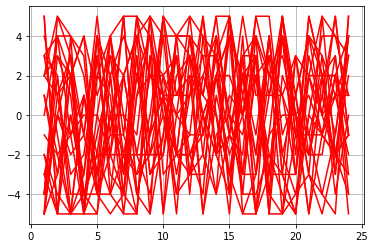

In [77]:
# fig, axs = plt.subplots(4)
for row in A:
    plt.plot(x, row,'r')
plt.grid()

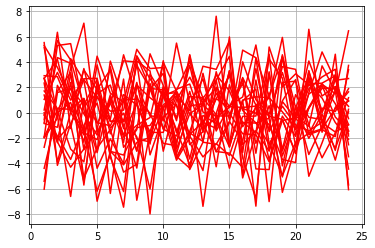

In [79]:
L,C,R = SVD(A,10)
A_ = prois(L,C,R)

for row in A_:
    plt.plot(x, row,'r')


plt.grid()


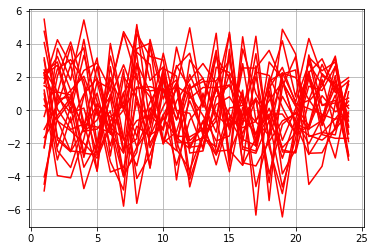

In [80]:
L,C,R = SVD(A,5)
A_ = prois(L,C,R)

for row in A_:
    plt.plot(x, row,'r')


plt.grid()

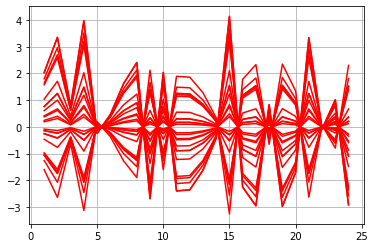

In [81]:
L,C,R = SVD(A,1)
A_ = prois(L,C,R)

for row in A_:
    plt.plot(x, row,'r')


plt.grid()